### 크레딧 카드 사용 기록

#### 필요한 패키지를 불러온다

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#### 데이터를 불러와서 살펴 본다

In [3]:
os.chdir(r"C:\myPyCode2\01 Python 분석 기초 - 실습\data")
df = pd.read_csv('data_credit.csv', header='infer',encoding='latin1')

In [4]:
df.shape

(3362796, 8)

In [5]:
df.head(5)

,store_id,date,time,card_id,amount,installments,days_of_week,holyday
0,0,2016-12-14,18:05:31,d297bba73f,5,NaN,2,0
1,0,2016-12-14,18:05:54,d297bba73f,-5,NaN,2,0
2,0,2016-12-19,12:42:31,0880849c05,144,NaN,0,0
3,0,2016-12-19,12:48:08,8b4f9e0e95,66,NaN,0,0
4,0,2016-12-19,13:31:08,7ad237eed0,24,NaN,0,0


#### 데이터를 클리닝하고 결측치 처리를 한다

In [6]:
# 결측치가 분명히 있는 것 같으니 컬럼별 집계해 본다.
nas = df.isnull()
print(nas.sum(axis=0))

store_id              0
date                  0
time                  0
card_id               0
amount                0
installments    3345936
days_of_week          0
holyday               0
dtype: int64


In [12]:
# installments 변수의 도수분포를 본다.
df['installments'].value_counts()

1.0     3345936
3.0       10686
2.0        3431
5.0        1220
6.0         647
10.0        252
4.0         209
12.0        206
24.0         96
8.0          32
7.0          28
9.0          25
18.0         11
20.0          6
36.0          5
22.0          4
15.0          2
Name: installments, dtype: int64

In [8]:
# 일시불이 NA로 처리 되었으니 결측치를 1로 채운다.
df = df.fillna(value=1)
df.head(5)

,store_id,date,time,card_id,amount,installments,days_of_week,holyday
0,0,2016-12-14,18:05:31,d297bba73f,5,1.0,2,0
1,0,2016-12-14,18:05:54,d297bba73f,-5,1.0,2,0
2,0,2016-12-19,12:42:31,0880849c05,144,1.0,0,0
3,0,2016-12-19,12:48:08,8b4f9e0e95,66,1.0,0,0
4,0,2016-12-19,13:31:08,7ad237eed0,24,1.0,0,0


In [ ]:
# 다시 installments 변수의 도수분포를 본다.
df['installments'].value_counts()

In [ ]:
# 일단 date와 time은 사용하지 않겠으니 제거한다
df = df.drop(columns=['date','time'])
df.head(5)

#### 개개 변수를 다양한 방법으로 요약하고 시각화 한다

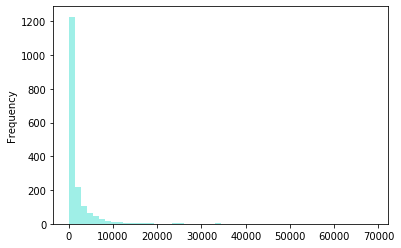

In [13]:
#
# store_id의 도수의 히스토그램.
#
freq1 = df['store_id'].value_counts()
freq1.plot.hist(bins=50,color="turquoise",alpha=0.5)
#sns.distplot(freq1.values,bins=50,color="turquoise")
plt.show()

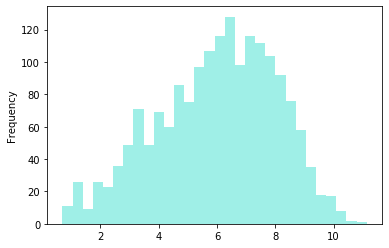

In [14]:
# 큰 skew를 보이므로 log 변환해 본다.
freq1b = np.log(freq1+1)
freq1b.plot.hist(bins=30,color="turquoise",alpha=0.5)
plt.show()

In [16]:
# 중위수를 계산해 본다.
print(np.median(freq1))

492.0


In [17]:
# Top sore id를 본다.
freq1.sort_values(ascending=False)[:10]

0       68773
753     39318
105     36063
1342    33335
428     33285
221     31409
161     27170
1038    25694
323     25221
1366    24946
Name: store_id, dtype: int64

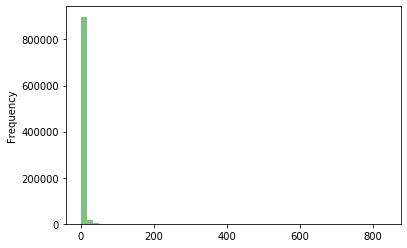

In [18]:
#
# card_id의 도수의 히스토그램.
#
freq2 = df['card_id'].value_counts()
freq2.plot.hist(bins=50,color="green",alpha=0.5)
#sns.distplot(freq2.values,bins=50,color="green")
plt.show()

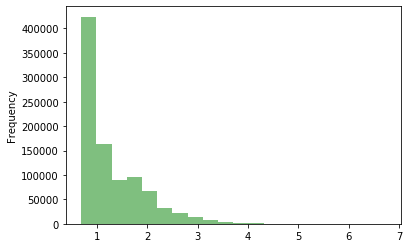

In [19]:
# 큰 skew를 보이므로 log 변환해 본다.
freq2b = np.log(freq2+1)
freq2b.plot.hist(bins=20,color="green",alpha=0.5)
#sns.distplot(freq2b.values,bins=20,color="green",kde=False)
plt.show()

In [20]:
# 사용 횟수 Top 10 card id를 본다.
freq2.sort_values(ascending=False)[:10]

53817035d4    835
93bba5079c    512
994b71a98a    458
18549044f3    453
6b2d18c5c5    433
10a5c30cda    425
06e61d93b8    423
5cf0b23473    413
0177959e09    409
a9a1e3d97d    405
Name: card_id, dtype: int64

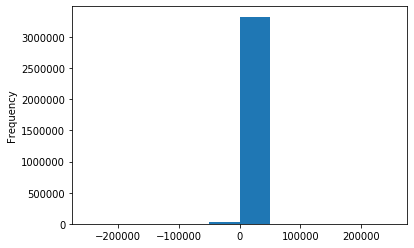

In [21]:
#
# amount의 히스토그램.
# 
df['amount'].plot.hist(bins=10)
# sns.distplot(df.amount,bins=10,kde=False)
plt.show()

In [23]:
# 실제 구매 or Cancel.
ser = df.amount > 0
np.round(ser.mean(),4)             # 실제 구매의 퍼센티지.

0.9896

In [24]:
#
# installments의 막대그림.
# 
freq3 = df['installments'].value_counts()
print("installments의 가짓수 = {}".format((freq3.index).nunique()))

installments의 가짓수 = 17


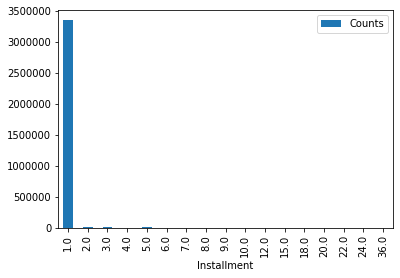

In [25]:
# 도수 분포를 본다.
freq3 = freq3.sort_index()
df2 = pd.DataFrame({"Installment": freq3.index, "Counts":freq3.values})
df2.plot.bar(x="Installment")
#sns.countplot(data=df, x='installments')   # Seaborn의 countplot이 집계하여 보여준다.
plt.show()

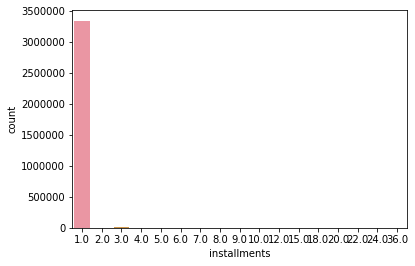

In [29]:
sns.countplot(data=df, x='installments')   # Seaborn의 countplot이 집계하여 보여준다.
plt.show()

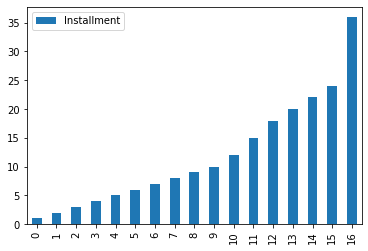

In [32]:
# not good example ...
freq3 = freq3.sort_index()
df2 = pd.DataFrame({"Installment": freq3.index, "Counts":freq3.values})
df2.plot.bar(y="Installment")
plt.show()

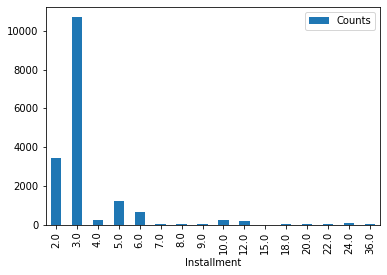

In [30]:
# installment = 1 (일시불)이 너무나 많으니 제거하고 다시 시각화 해본다.
freq3b = df[df.installments != 1]['installments'].value_counts()
freq3b = freq3b.sort_index()
df2 = pd.DataFrame({"Installment": freq3b.index, "Counts":freq3b.values})
df2.plot.bar(x="Installment")
#sns.countplot(data=df[df.installments != 1], x='installments')
plt.show()

days of week의 가짓수 = 7


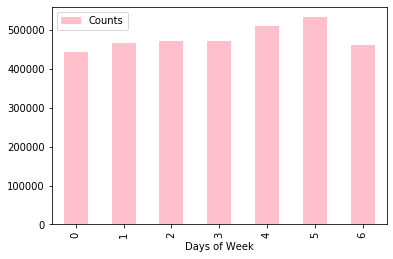

In [47]:
#
# days_of_week의 도수 막대그림.
# 
freq4 = df['days_of_week'].value_counts()
freq4 = freq4.sort_index()
df2 = pd.DataFrame({"Days of Week": freq4.index, "Counts":freq4.values})
df2.plot.bar(x="Days of Week",color='pink')
print("days of week의 가짓수 = {}".format((freq4.index).nunique()))
plt.show()

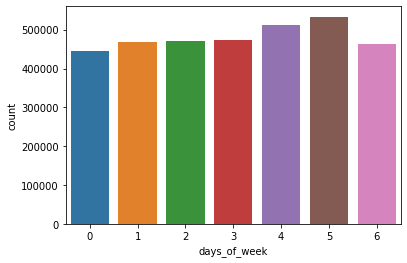

In [34]:
# for seaborn
 sns.countplot(data=df, x='days_of_week')
 plt.show()

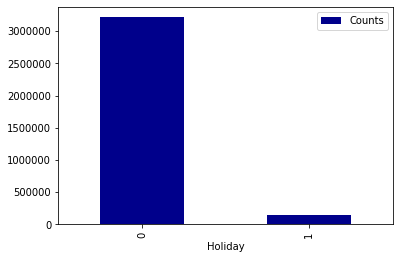

In [53]:
#
# holiday의 막대그림.
# 
freq5 = df['holyday'].value_counts()                    # 스펠링 오류!!! 
freq5 = freq5.sort_index()
df2 = pd.DataFrame({"Holiday": freq5.index, "Counts":freq5.values})
df2.plot.bar(x="Holiday",color='darkblue')
plt.show()

#### 일변량 요약과 시각화

In [54]:
# 휴일 여부별 평균 사용 금액.
df.groupby('holyday')['amount'].mean()

holyday
0    146.476094
1    134.881488
Name: amount, dtype: float64

In [55]:
# 요일별 평균 결제 금액.
ser1 = df.groupby('days_of_week')['amount'].mean()
ser1

days_of_week
0    143.199131
1    148.230134
2    149.429079
3    150.447155
4    150.952690
5    146.961930
6    131.532084
Name: amount, dtype: float64

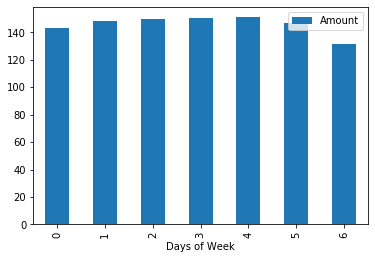

In [56]:
# 시각화.
pd.DataFrame({"Days of Week":ser1.index, "Amount":ser1.values}).plot.bar(x="Days of Week")
plt.show()

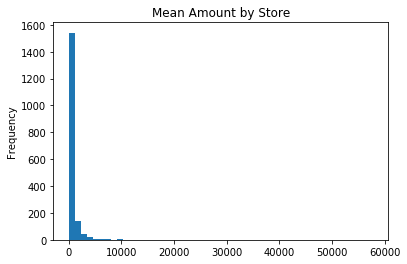

In [57]:
# store_id 별 평균 결제 금액.
ser2 = df.groupby('store_id')['amount'].mean()
ser2.plot.hist(x="Store ID",title="Mean Amount by Store",bins=50)
plt.show()

In [75]:
# store_id 별 Total 결제 금액. Top 10.
ser2b = df.groupby('store_id')['amount'].sum()
ser2b.sort_values(ascending=False)[:10]

store_id
753     9474601
1342    7301327
161     5236075
0       5234611
958     4965728
1076    4860885
810     3677501
1024    3330293
486     3235482
597     2999180
Name: amount, dtype: int64

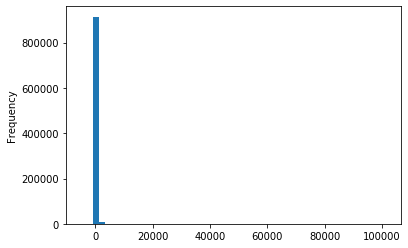

In [79]:
# card_id 별 평균 결제 금액.
ser3 = df.groupby('card_id')['amount'].mean()
ser3.plot.hist(bins=50)
plt.show()

In [80]:
# card_id 별 Total 결제 금액. Top 10.
ser3b = df.groupby('card_id')['amount'].sum()
ser3b.sort_values(ascending=False)[:10]

card_id
f8218bde68    761667
4a26873e51    562793
d8b799ac0c    551625
de78de56a0    534700
2796a2b778    375918
a5a894cfa6    344577
3a9deab63f    333884
46a88eb161    283820
10a5c30cda    241858
48e87aab97    235428
Name: amount, dtype: int64

#### 분류

In [81]:
#
# store_id 별 Total 결제 금액에 의한 3 등급 분류.
#
ser2c = pd.qcut(ser2b,3,labels=['Low', 'Medium', 'High'])                      # qcut() 함수 사용!
combo2 = pd.DataFrame({"Store ID":ser2b.index, "Amount":ser2b.values, "Category":ser2c.values})
combo2.head(10)

,Store ID,Amount,Category
0,0,5234611,High
1,1,147950,Medium
2,2,1615060,High
3,3,62781,Medium
4,4,270312,High
5,5,184437,Medium
6,6,1389983,High
7,7,109510,Medium
8,8,515535,High
9,9,19760,Low


In [82]:
# 등급별 평균.
combo2.groupby("Category")["Amount"].mean()

Category
Low        23272.582770
Medium    125787.788494
High      680276.184122
Name: Amount, dtype: float64

In [83]:
#
# card_id 별 Total 결제 금액에 의한 3 등급 분류.
#
ser3c = pd.qcut(ser3b,3,labels=['Low', 'Medium', 'High'])
combo3 = pd.DataFrame({"Card ID":ser3b.index,"Amount":ser3b.values, "Category":ser3c.values})
combo3.head(10)

,Card ID,Amount,Category
0,000009e765,10,Low
1,00000f9eaa,331,Medium
2,0000134335,90,Low
3,000024f480,80,Low
4,000036a26b,720,High
5,00003c84e3,255,Medium
6,00003cb9a7,85,Low
7,000043b1cb,1186,High
8,000055e420,187,Medium
9,00008a3f32,335,Medium


In [84]:
# 등급별 평균.
combo3.groupby("Category")["Amount"].mean()

Category
Low         63.729680
Medium     219.315716
High      1318.055873
Name: Amount, dtype: float64